In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class Kmeans:
    def __init__(self, clusters, max_iters = 100):
        self.clusters = clusters
        self.max_iter = max_iters
        self.centroids = None
        
    def fit_predict(self, x):
        random_index = random.sample(range(0, x.shape[0]), self.clusters)
        self.centroids = x[random_index]
        cluster_group = []
        
        for i in range(self.max_iter):
            # Assign clusters   step 3
            cluster_group = self.assign_cluster(x)
            
            # Move centroid
            old_centroids = self.centroids
            self.centroids = self.move_centroids(x, cluster_group)
            
            # Cheak finish
            if np.all(old_centroids == self.centroids):
                break
        return cluster_group
       
    
    def assign_cluster(self, x):
        cluster_group = []
        distance = []
        
        for row in x:
            for centroid in self.centroids:
                distance.append(np.sqrt(np.sum(np.square(row-centroid))))
            min_distance = min(distance)
            min_index = distance.index(min_distance)
            cluster_group.append(min_index)
            distance.clear()
        return np.array(cluster_group)
    
    def move_centroids(self, x, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        
        for Type in cluster_type:
            new_centroids.append(x[cluster_group == Type].mean(axis=0))
        return np.array(new_centroids)

In [3]:
df = pd.read_csv("student_clustering.csv")
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [4]:
x = df.iloc[:,:].values

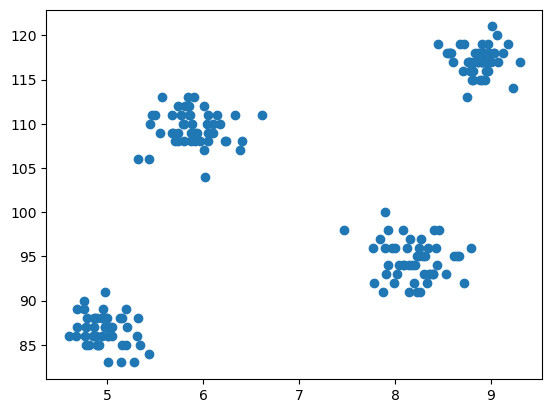

In [5]:
plt.scatter(df["cgpa"], df["iq"])
plt.show()

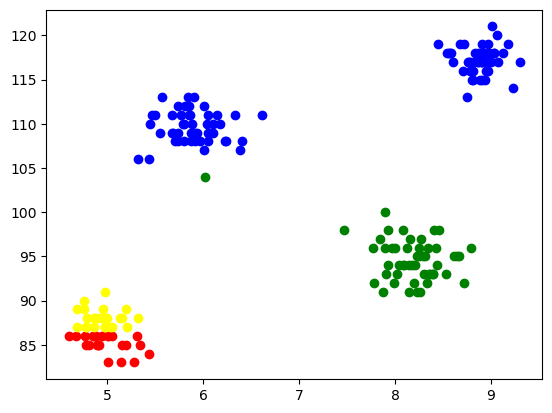

In [6]:
kmeans = Kmeans(clusters=4, max_iters=100)
y_means = kmeans.fit_predict(x)
# print(y_means)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], color="blue")
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], color="green")
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], color="red")
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], color="yellow")
plt.show()